# Time Series data generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Equation of a wave: y(x,t) = a * sin (ω*x + φ) 

a = amplitude of the wave (min max values)

ω = angular frequency (how many cycles occur in a second)

x = number of points

φ = phase of the signal (where do we start)

In [436]:
def timeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    for i in range(len(amplitude)):
      y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    return y

def timeseriesPeak(timeseries,x):
    start = np.random.randint(len(x))
    end = start+100
    
    peak = np.sin(0.001*x)*300
    peak += np.random.rand(1000)
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseries+peak


def timeseriesDec(amplitude,frequency,phase,x,b):
    y = np.zeros(len(x))
    for i in range(len(amplitude)):
      y += np.sin(frequency[i]*x-phase[i])*amplitude[i]-b[i]*x
    return y

def timeseriesPeakDec(timeseriesDec,x):
    start = np.random.randint(len(x))
    end = start+100
    
    peakDec = np.sin(0.01*x)*200+500*x
    peakDec += np.random.rand(1000)
    
    peakDec[x<start]=0
    peakDec[x>end]=0
    
    return timeseriesDec+peakDec

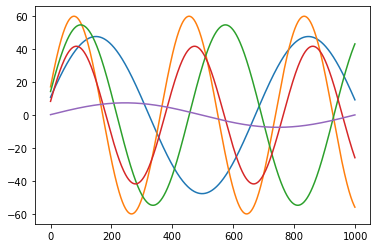

In [365]:
# vectors for w phase and amplitude regular shape
# these arrrays contain 200 random values between (0,1) and we multiply the w by 0.02 to
# ensure cycles in the time series 
p2 = np.random.rand(200)
a2 = np.random.rand(200)
w2 = np.ones(200)*0.02

x = np.arange(start=0, stop=(1000))

# We will create 200 time series, we will multiply the w phase and amplitude
# to obtain different results
yValues = []
for i in range(1,200):
    rand_w = np.random.uniform(0.3,1)
    rand = np.random.uniform(0,1)
    y=timeseries(a2*rand,w2*rand_w,p2*rand,x)
    yValues.append(y)
    if i <= 5:
        plt.plot(x,y)

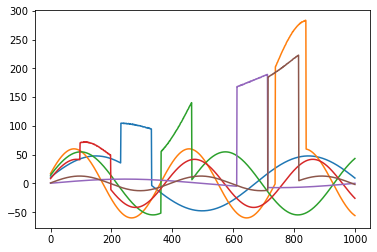

In [435]:
# We will create 200 time series with spikes
ySpikes = []
for i in range(0,len(yValues)):
    y = timeseriesPeak(yValues[i],x)
    ySpikes.append(y)
    if i <= 5:
        plt.plot(x,y)

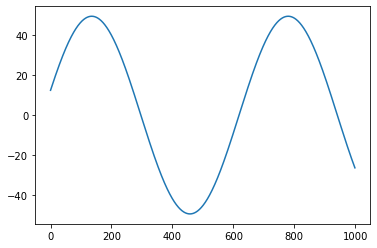

In [5]:
plt.plot(x,yValues[25])

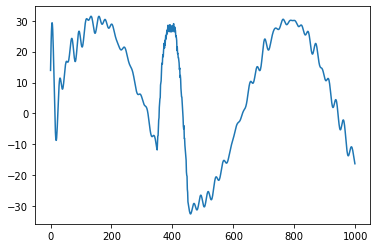

In [367]:
randcomp = 200

w_rand_ampl=0.2
w_rand_offs=0.1

w = np.random.rand(200)*0.2+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y += np.sin(w[i]*x+p[i])*a[i]

peak = -0.02*(x-400)**2+50
peak += np.random.rand(1000)*3
peak[x<350]=0
peak[x>450]=0
#plt.plot(x,peak)
plt.plot(x,y+peak+np.sin(0.01*x)*30)



In [7]:
x= np.arange(start=0, stop=(1000)) 




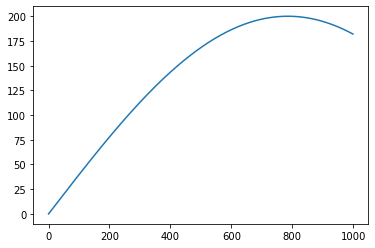

In [368]:

x = np.arange(start=0, stop=(1000))
y= np.sin(x*0.002)*200
plt.plot(x,y)

714
814


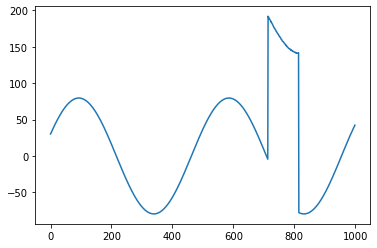

In [369]:
start = np.random.randint(900)
end = start+100
print(start)
print(end)

peak = np.sin(0.001*x)*300
peak += np.random.rand(1000)
peak[x<start]=0
peak[x>end]=0
plt.plot(x,yValues[25]+peak)
#plt.plot(x,peak)

In [10]:
peak = -(start+50)**2
print(peak)

-194481


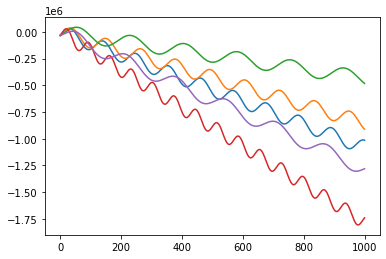

In [438]:
p3 = np.random.rand(200)
a3 = np.random.randint(100,600,200)
w3 = np.ones(200)
b = np.ones(200)


x = np.arange(start=0, stop=(1000))


yValuesDec = []
for i in range(1,200):
    rand_w = np.random.uniform(0.02,0.1)
    rand = np.random.uniform(1,10)
    y = timeseriesDec(a3,w3*rand_w,p3,x,b*rand)
    yValuesDec.append(y)
    if i <= 5:
        plt.plot(x,y)


#z = np.sin(x*0.02-150)*400-4*x

#plt.plot(x,z)





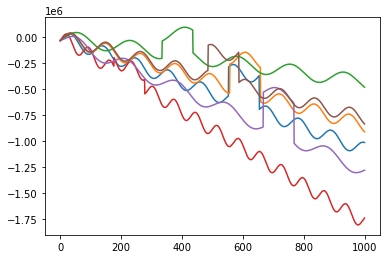

In [440]:
# We will create 200 time series with spikes
ySpikes = []
for i in range(0,len(yValuesDec)):
    y = timeseriesPeakDec(yValuesDec[i],x)
    ySpikes.append(y)
    if i <= 5:
        
        plt.plot(x,y)